<a href="https://colab.research.google.com/github/SumitJana404/UpSkill-Campus/blob/main/SmartCityTrafficPatterns_Final_SumitJana_USC_UCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.ensemble import ExtraTreesClassifier
import operator
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import psutil
from memory_profiler import memory_usage

In [9]:
# Starting time for time calculations
start_time = time.time()

Loading datasets

In [10]:
# reading train dataframe
df_train = pd.read_csv("/content/train_aWnotuB.csv")


In [11]:
df_train.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [12]:
# reading test dataframe
df_test = pd.read_csv("/content/test_BdBKkAj.csv")

In [13]:
df_test.head()

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [14]:
df_train.shape

(48120, 4)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
df_test.shape

(11808, 3)

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


so there is no null value present

In [18]:
# Converting to datetime -coz the data type of DateTime column was object in train dataset

df_train['DateTime'] = pd.to_datetime(df_train['DateTime'])

In [19]:
#checking the data types once again
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [20]:
# Converting to datetime -coz the data type of DateTime column was object in test dataset

df_test['DateTime'] = pd.to_datetime(df_test['DateTime'])

In [21]:
#lets check the data types once again
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  11808 non-null  datetime64[ns]
 1   Junction  11808 non-null  int64         
 2   ID        11808 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 276.9 KB


Creating features from DateTime for train data

In [22]:

df_test['Weekday'] = [datetime.weekday(date) for date in df_test.DateTime]
df_test['Year'] = [date.year for date in df_test.DateTime]
df_test['Month'] = [date.month for date in df_test.DateTime]
df_test['Day'] = [date.day for date in df_test.DateTime]
df_test['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in df_test.DateTime]
df_test['Week'] = [date.week for date in df_test.DateTime]
df_test['Quarter'] = [date.quarter for date in df_test.DateTime]


Creating features from DateTime for test data

In [23]:

df_train['Weekday'] = [datetime.weekday(date) for date in df_train.DateTime]
df_train['Year'] = [date.year for date in df_train.DateTime]
df_train['Month'] = [date.month for date in df_train.DateTime]
df_train['Day'] = [date.day for date in df_train.DateTime]
df_train['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in df_train.DateTime]
df_train['Week'] = [date.week for date in df_train.DateTime]
df_train['Quarter'] = [date.quarter for date in df_train.DateTime]

function for time to second

In [24]:
def datetounix(df):
    # Initialising unixtime list
    unixtime = []

    # Running a loop for converting Date to seconds
    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))

    # Replacing Date with unixtime list
    df['DateTime'] = unixtime
    return(df)

creating an instance for tree feature selection

In [25]:
tree_clf = ExtraTreesClassifier()

extracting dependent and independent variables separetely

In [26]:
# first creating arrays holding input and output data -> getting the features into an array X -> removing target column from the df
df_train_features = df_train.drop(['Vehicles'], axis=1)

# Converting timestamp to seconds
df_train_features = datetounix(df_train_features)

# storing features in X array
X = df_train_features.values

# Storing target feature in y array
y = df_train['Vehicles'].values

fitting the model

In [27]:
# Define your training function
def train_model():
    # Your training code here
    tree_clf.fit(X, y)

# Measure memory consumption during training
mem_usage_train = memory_usage(train_model)
print(f"Memory usage during training: {max(mem_usage_train)} MB")



Memory usage during training: 10601.984375 MB


Preparing variables

In [28]:

importances = tree_clf.feature_importances_
feature_names = df_train_features.columns.tolist()

feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)

indices = np.argsort(importances)[::-1]


Printing the feature ranking

In [29]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

Feature ranking:
feature 0 : DateTime (0.375210)
feature 7 : Time (0.360473)
feature 6 : Day (0.065449)
feature 3 : Weekday (0.060492)
feature 2 : ID (0.051871)
feature 1 : Junction (0.044438)
feature 8 : Week (0.030493)
feature 5 : Month (0.007662)
feature 9 : Quarter (0.002165)
feature 4 : Year (0.001747)


Plot the feature importances of the forest

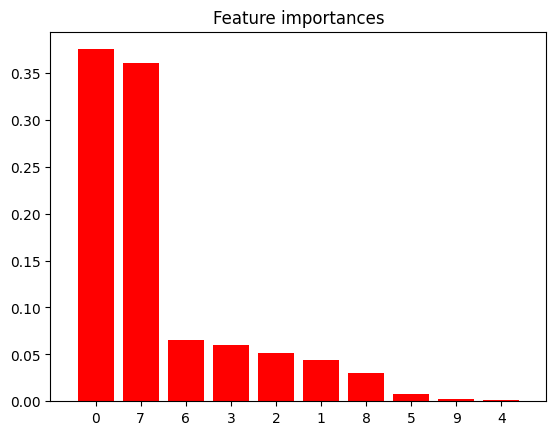

In [30]:
plt.figure(0)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

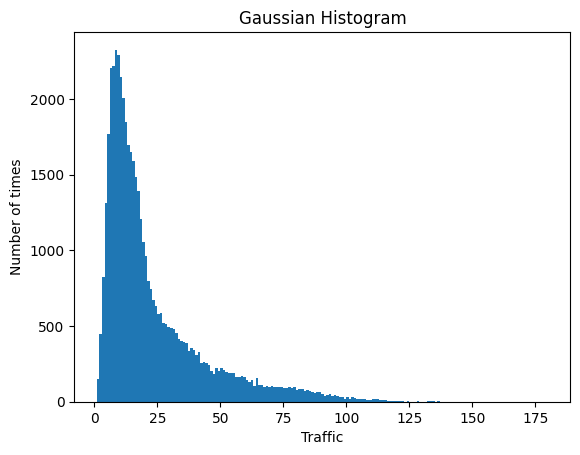

In [31]:
# Visualising the histogram for positive reviews only from train and dataset
data = df_train.Vehicles
binwidth = 1
plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth), log=False)
plt.title("Gaussian Histogram")
plt.xlabel("Traffic")
plt.ylabel("Number of times")
plt.show()

X_test creation for Prediction

In [32]:

# Converting timestamp to seconds
df_test_features = datetounix(df_test.drop(['Year', 'Quarter', 'Month', 'ID'], axis=1))

# Creating X_test from the test set

X_test = df_test_features.values


Dropping Features from train set

In [33]:

df_train_features = df_train.drop(['Vehicles','Year', 'Quarter', 'Month', 'ID'], axis=1)

# Converting timestamp to seconds
df_train_features = datetounix(df_train_features)


# storing features in X array
X = df_train_features.values

# storing target in y array
y = df_train['Vehicles'].values

Using Decision Tree to Learn

In [34]:
#Data preparation
df_solution = pd.DataFrame()
df_solution['ID'] = df_test.ID


In [35]:
# Creating decision tree object
clf = DecisionTreeClassifier(criterion='gini', random_state = 30)

def train_model2():
    # fit the model
    clf.fit(X, y)

# Measuring memory consumption during training
mem_usage_train = memory_usage(train_model2)
print(f"Memory usage during training: {max(mem_usage_train)} MB")

Memory usage during training: 10709.5859375 MB


In [36]:
# Defining prediction function
def make_predictions():

    predictions = clf.predict(X_test)

# Measuring memory consumption during prediction
mem_usage_pred = memory_usage(make_predictions)
print(f"Memory usage during prediction: {max(mem_usage_pred)} MB")


print("The time taken to execute is %s seconds" % (time.time() - start_time))

Memory usage during prediction: 10658.14453125 MB
The time taken to execute is 23.490198135375977 seconds


Preparing Solution dataframe

In [37]:
predictions = clf.predict(X_test)
df_solution['Vehicles'] = predictions
df_solution.head()

,ID,Vehicles
0,20170701001,66
1,20170701011,62
2,20170701021,52
3,20170701031,39
4,20170701041,40


In [38]:
df_solution.tail()

,ID,Vehicles
11803,20171031194,16
11804,20171031204,16
11805,20171031214,16
11806,20171031224,22
11807,20171031234,18


Sorting in descending order of vehicles/ Peek traffic
---



In [47]:
# Sort the DataFrame in descending order based on 'Vehicles' column
df_solution_sorted = df_solution.sort_values(by='Vehicles', ascending=False)

# Print the sorted DataFrame
print(df_solution_sorted.head(10))

               ID  Vehicles
757   20170801131       110
1091  20170815111       110
2131  20170927191       110
443   20170719111       110
444   20170719121       110
445   20170719131       110
446   20170719141       110
447   20170719151       110
448   20170719161       110
449   20170719171       110


In ascending order/ Least traffic

In [48]:
# Sort the DataFrame in descending order based on 'Vehicles' column
df_solution_sorted = df_solution.sort_values(by='Vehicles', ascending=True)

# Print the sorted DataFrame
print(df_solution_sorted.head(15))

                ID  Vehicles
8885   20170702054         1
10565  20170910054         1
10397  20170903054         1
11069  20171001054         1
9725   20170806054         1
11237  20171008054         1
9053   20170709054         1
10085  20170821054         2
11141  20171004054         2
10396  20170903044         2
10757  20170918054         2
9125   20170712054         2
8933   20170704054         2
9605   20170801054         2
9555   20170730034         2


In [39]:
pd.set_option('display.max_rows', None)

Displaying all rows

In [40]:
df_solution

,ID,Vehicles
0,20170701001,66
1,20170701011,62
2,20170701021,52
3,20170701031,39
4,20170701041,40
5,20170701051,40
6,20170701061,40
7,20170701071,31
8,20170701081,47
9,20170701091,44
